## Install MMSegmentation¶

In [2]:
!pip install torch==2.0.0
!pip install openmim

In [3]:
!mim install mmengine
!mim install mmcv>=2.0.0
!pip install mmsegmentation>=1.0.0
!pip install ftfy 

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch2.0.0/index.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 kB 13.7 MB/s eta 0:00:00
/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.2 MB/s eta 0:00:00


In [4]:
# !git clone -b main https://github.com/open-mmlab/mmsegmentation.git

fatal: destination path 'mmsegmentation' already exists and is not an empty directory.


In [5]:
# !cd mmsegmentation && pip install -e .

Obtaining file:///kaggle/working/mmsegmentation
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmsegmentation
    Found existing installation: mmsegmentation 1.2.2
    Uninstalling mmsegmentation-1.2.2:
      Successfully uninstalled mmsegmentation-1.2.2
  Running setup.py develop for mmsegmentation


In [38]:
# !mim download mmsegmentation --config ocrnet_hr18_4xb2-160k_cityscapes-512x1024 --dest .

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
processing ocrnet_hr18_4xb2-160k_cityscapes-512x1024...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 MiB 38.5 MB/s eta 0:00:0000:0100:01
Successfully downloaded ocrnet_hr18_512x1024_160k_cityscapes_20200602_191001-b9172d0c.pth to /kaggle/working
Successfully dumped ocrnet_hr18_4xb2-160k_cityscapes-512x1024.py to /kaggle/working


In [5]:
import torch
import mmseg
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Using device: cuda


In [6]:
from mmseg.apis import inference_model, init_model, show_result_pyplot
import mmcv

config_file = '/kaggle/working/ocrnet_hr18_4xb2-160k_cityscapes-512x1024.py'
checkpoint_file = '/kaggle/working/ocrnet_hr18_512x1024_160k_cityscapes_20200602_191001-b9172d0c.pth'

# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cpu')

# test a single image and show the results
img = '/kaggle/working/mmsegmentation/demo/demo.png'  # or img = mmcv.imread(img), which will only load it once
result = inference_model(model, img)
# visualize the results in a new window
show_result_pyplot(model, img, result, show=True)
# or save the visualization results to image files
# you can change the opacity of the painted segmentation map in (0, 1].
show_result_pyplot(model, img, result, show=True, out_file='result.jpg', opacity=0.5)

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda9SetDeviceEi'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/opt/conda/lib/python3.10/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/opt/conda/lib/python3.10/site-packages/mmseg/models/losses/cross_ent

Loads checkpoint by local backend from path: /kaggle/working/dmnet_r50-d8_512x1024_40k_cityscapes_20201215_042326-615373cf.pth


/opt/conda/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


array([[[129, 136, 129],
        [110, 122, 116],
        [ 94,  99,  99],
        ...,
        [ 86,  90,  80],
        [ 88,  91,  81],
        [ 86,  90,  80]],

       [[130, 138, 130],
        [115, 124, 118],
        [ 94,  99,  99],
        ...,
        [ 86,  90,  80],
        [ 88,  90,  79],
        [ 86,  90,  80]],

       [[129, 136, 129],
        [115, 124, 118],
        [ 94,  99,  99],
        ...,
        [ 86,  90,  80],
        [ 86,  88,  78],
        [ 86,  90,  80]],

       ...,

       [[ 88,  63,  91],
        [ 88,  63,  91],
        [ 88,  61,  90],
        ...,
        [102,  77, 102],
        [100,  76, 101],
        [102,  77, 102]],

       [[ 88,  61,  90],
        [ 88,  63,  91],
        [ 86,  61,  89],
        ...,
        [ 99,  73, 100],
        [100,  74, 100],
        [100,  74, 101]],

       [[ 88,  61,  90],
        [ 88,  63,  91],
        [ 86,  61,  89],
        ...,
        [ 90,  60,  88],
        [ 89,  62,  89],
        [ 92,  65,  92]]

# Load and prepare data for training

In [4]:
from glob import glob
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme()
import pandas as pd
import os
import json

# ================================================================================================

import platform
import sys

In [3]:
# !mkdir /kaggle/working/OR_lab2/_models
# !mkdir /kaggle/working/OR_lab2/_figures

NameError: name 'kaggle' is not defined

In [5]:
# ---------------------------------------------------------------------------
root = "/kaggle/input/fashionpedia-or/fashionpedia"
working_dir = "/kaggle/working"
# ---------------------------------------------------------------------------
# Set models and figures directories
models_dir = "/kaggle/working/OR_lab2/_models"
figures_dir = "/kaggle/working/OR_lab2/_figures"
# ---------------------------------------------------------------------------

In [8]:
def load_annotations(annotation_file):
    with open(annotation_file) as f:
        data = json.load(f)
        
    images = pd.DataFrame(data['images'])
    annotations = pd.DataFrame(data['annotations'])
    categories = pd.DataFrame(data['categories'])
    
    return images, annotations, categories

def aggregate_rellevant_training_data(group):
    category_ids = []
    segmentations = []
    file_name = ""
    
    for _, row in group.iterrows():
        category_ids.append(row['category_id'])
        segmentation = row['segmentation']
        if isinstance(segmentation, list):  # If polygon encoded
            segmentations.extend(segmentation)
        elif isinstance(segmentation, dict):  # If RLE encoded
            segmentations.append(segmentation)
        file_name = row['file_name']

    result_df = pd.Series({'image_id': group['image_id'].iloc[0], 'categories_ids': category_ids, 'segmentations': segmentations, 'file_name': file_name})
    return result_df

def plot_raw_segmented_image(image_info, image_path, figsize=(15, 15)):
    image = cv2.imread(image_path)
    masked_image = image.copy()

    encoded_pixels = image_info["segmentations"]
    class_ids = image_info["categories_ids"]

    # Plot the original image
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].imshow(image)

    mask = np.zeros_like(image[:, :, 0])
    for pixels, class_id in zip(encoded_pixels, class_ids):
        # Create a mask for the current segment
        vertices = np.array(pixels).reshape((-1, 2)).astype(np.int32)
        cv2.fillPoly(mask, [vertices], 255 - class_id * 4)

    axs[1].imshow(image)
    axs[1].imshow(mask, alpha=0.8)

    plt.show()
    
    
def save_raw_segmented_image(image_info, image_path, output_dir):
    image = cv2.imread(image_path)
    masked_image = image.copy()

    encoded_pixels = image_info["segmentations"]
    class_ids = image_info["categories_ids"]

    mask = np.zeros_like(image[:, :, 0])
    for pixels, class_id in zip(encoded_pixels, class_ids):
        # Create a mask for the current segment
        vertices = np.array(pixels).reshape((-1, 2)).astype(np.int32)
        cv2.fillPoly(mask, [vertices], 255 - class_id * 4)

    # Apply the mask to the image
    masked_image[mask > 0] = [0, 255, 0]  # Set mask region to green (you can change color if needed)

    # Save the masked image
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, masked_image)

In [6]:
def preprocess_image(image_path):
    train_transforms = transforms.Compose([
        transforms.RandomRotation(degrees=20),  # Random rotation (±20 degrees)
        transforms.RandomHorizontalFlip(),      # Random horizontal flip
        transforms.RandomVerticalFlip(),        # Random vertical flip
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), 
        transforms.RandomResizedCrop(size=(height, width), scale=(0.8, 1.0)),  # Random resized crop
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=0.1),  # Random affine transformation
        transforms.ToTensor(),                  # Convert image to tensor
    ])
    
    img = mmcv.imread(image_path)
    img = train_transforms(img)
    return img

def inference_and_visualize(model, image_path, output_dir):
    img = preprocess_image(image_path)
    result = inference_model(model, img)
    show_result_pyplot(model, img, result, show=False, out_file=os.path.join(output_dir, 'result.jpg'))


In [9]:
train_images, train_annotations, train_categories = load_annotations(root + "/Annotations/instances_attributes_train2020.json")
test_images, test_annotations, test_categories = load_annotations(root + "/Annotations/instances_attributes_val2020.json")

train_merged_df = pd.merge(train_annotations, train_images, left_on='image_id', right_on='id', how='outer')
train_merged_df = train_merged_df.drop(columns=['id_x', 'id_y', 'license', 'time_captured', 'isstatic', 'original_url', 'iscrowd', 'kaggle_id'])


relevant_training_data = train_merged_df.groupby('image_id').apply(aggregate_rellevant_training_data)
relevant_training_data.reset_index(drop=True, inplace=True)

relevant_training_data.head()

/tmp/ipykernel_34/28044364.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  relevant_training_data = train_merged_df.groupby('image_id').apply(aggregate_rellevant_training_data)


,image_id,categories_ids,segmentations,file_name
0,23,"[23, 23, 33, 10]","[[456, 970, 465, 979, 483, 982, 501, 983, 503,...",3ce385855f07c77fdeb911ed15094c53.jpg
1,25,"[2, 33, 31, 31, 13, 7, 22, 22, 23, 23]","[[391, 233, 393, 233, 397, 233, 398, 233, 400,...",97e45101f7235a9e56fa95c5e4980c17.jpg
2,26,"[13, 29, 28, 32, 32, 31, 31, 0, 31, 31, 18, 4,...","[[441, 135, 456, 139, 457, 143, 462, 148, 472,...",47cbe3ead1617a9971dccc438a8e8884.jpg
3,27,"[6, 23, 23, 31, 31, 4, 1, 35, 32, 35, 35, 35, ...","[[317, 752, 324, 755, 330, 755, 334, 754, 340,...",361cc7654672860b1b7c85fe8e92b38a.jpg
4,28,"[10, 32, 35, 31, 4, 29, 33]","[[428, 1008, 420, 1016, 413, 1020, 406, 1022, ...",8a20effd8b6ebcaf2b74caa7d35eee41.jpg


In [ ]:
# No es necesari ja qu es fa on the fly
# output_directory = root + "/masked_images"
# os.makedirs(output_directory, exist_ok=True)

# train_images_path = root + "/train"
# relevant_training_data.apply(lambda row: save_masked_image(row, os.path.join(train_images_path, row["file_name"]), output_directory), axis=1)

# Train model

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from mmseg.apis import inference_model, init_model, show_result_pyplot
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import mmcv

In [40]:
def decode_rle(rle):
    """
    Decode a run-length encoded mask.
    """
    try:
        h, w = rle["size"]
        mask = np.zeros(h * w, dtype=np.uint8)
        counts = rle["counts"]
        counts = counts.encode('utf-8')  # Encoding the string to bytes for correct parsing
        counts = np.frombuffer(counts, dtype=np.uint8) - 48  # Convert ASCII codes to integer values
   
        starts = np.cumsum(counts[::2])
        
        min_length = min(len(starts), len(counts[1::2]))
        starts = starts[:min_length]
        
        ends = starts + counts[1::2]
        
        ends = ends[:min_length]
        
        for start, end in zip(starts, ends):
            mask[start:end] = 1
        mask = mask.reshape((h, w), order='F')
        return mask
    except Exception as e:
        print(f"Error decoding RLE: {str(e)}")
        raise e

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data_df, root_dir, transform=None):
        self.data_df = data_df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, idx):
        try:
            image_info = self.data_df.iloc[idx]
            image_path = os.path.join(self.root_dir, image_info['file_name'])
            image = cv2.imread(image_path)
            encoded_segments = image_info["segmentations"]
            class_ids = image_info["categories_ids"]
            mask = np.zeros_like(image[:, :, 0])
            for segment, class_id in zip(encoded_segments, class_ids):
                if isinstance(segment, dict):  # If RLE encoded
                    segment = decode_rle(segment)
                else:  # If polygon encoded
                    segment = np.array(segment).reshape((-1, 2)).astype(np.int32)
                    cv2.fillPoly(mask, [segment], 255 - class_id * 4)

            sample = {'image': image, 'mask': mask}

            if self.transform:
                sample = self.transform(sample)

            return sample
        except Exception as e:
            print("Encoded_seg: ", segment)
            print(f"Error processing item {idx}: {str(e)}")
            raise Exception

            
    
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']

        # Swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        mask = mask.transpose((0, 1))

        return {'image': torch.from_numpy(image),
                'mask': torch.from_numpy(mask)}

class ApplyTransform(object):
    def __init__(self, transform):
        self.transform = transform

    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']

        # Apply transformation to both image and mask
        image = self.transform(image)
        mask = self.transform(mask)

        # Ensure that the mask has a single channel
        if mask.shape[0] > 1:
            mask = mask[0]  # Take the first channel if there are multiple channels

        return {'image': image, 'mask': mask}

In [41]:
torch.cuda.empty_cache()
train_images_path = root + "/train"
batch_size = 8
learning_rate = LR = 0.001
num_epochs = 8
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
IMAGE_HEIGHT = 512
IMAGE_WIDTH = 512

# Define transformations
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=20),
    transforms.RandomResizedCrop(size=(IMAGE_HEIGHT, IMAGE_WIDTH), scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
])


train_dataset = CustomDataset(data_df=relevant_training_data,
                              root_dir=train_images_path,
                              transform=ApplyTransform(train_transforms))

In [42]:
# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

config_file = working_dir + '/ocrnet_hr18_4xb2-160k_cityscapes-512x1024.py'
checkpoint_file = working_dir +'/ocrnet_hr18_512x1024_160k_cityscapes_20200602_191001-b9172d0c.pth'

model = init_model(config_file, checkpoint_file, device=DEVICE)

Loads checkpoint by local backend from path: /kaggle/working/ocrnet_hr18_512x1024_160k_cityscapes_20200602_191001-b9172d0c.pth


In [38]:
#  # Release memory
# inputs = None
# masks = None
# outputs = None
# torch.cuda.empty_cache()

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
log_interval = 10


# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch_idx, sample_batched in enumerate(train_loader):
        inputs, masks = sample_batched['image'].to(DEVICE), sample_batched['mask'].to(DEVICE)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        masks = masks.squeeze(1)
        
        loss = criterion(outputs, masks)
        
        loss.backward()
        
        optimizer.step()
        
         # Release memory
        inputs = None
        masks = None
        outputs = None
        torch.cuda.empty_cache()
        
        # Print training statistics
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

OutOfMemoryError: CUDA out of memory. Tried to allocate 128.00 MiB (GPU 0; 15.89 GiB total capacity; 15.37 GiB already allocated; 16.12 MiB free; 15.58 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

# Test results

Testing the results obtained on a trained model

In [ ]:
visualization_output_directory = working_dir + "/visualization_results"
os.makedirs(visualization_output_directory, exist_ok=True) 

test_images_path = root + "/test"
for index, row in test_images.iterrows():
    image_path = os.path.join(test_images_path, row["file_name"])
    inference_and_visualize(model, image_path, visualization_output_directory)

# Plot some sample images

Image ID: 17370
Image path: /kaggle/input/fashionpedia-or/fashionpedia/train/ee137a602993cc4bfdeb851cf46ad878.jpg
Image info: image_id                                                      21374
categories_ids                           [1, 8, 31, 31, 33, 23, 23]
segmentations     [[328, 358, 368, 357, 388, 352, 404, 348, 389,...
file_name                      ee137a602993cc4bfdeb851cf46ad878.jpg
Name: 17370, dtype: object


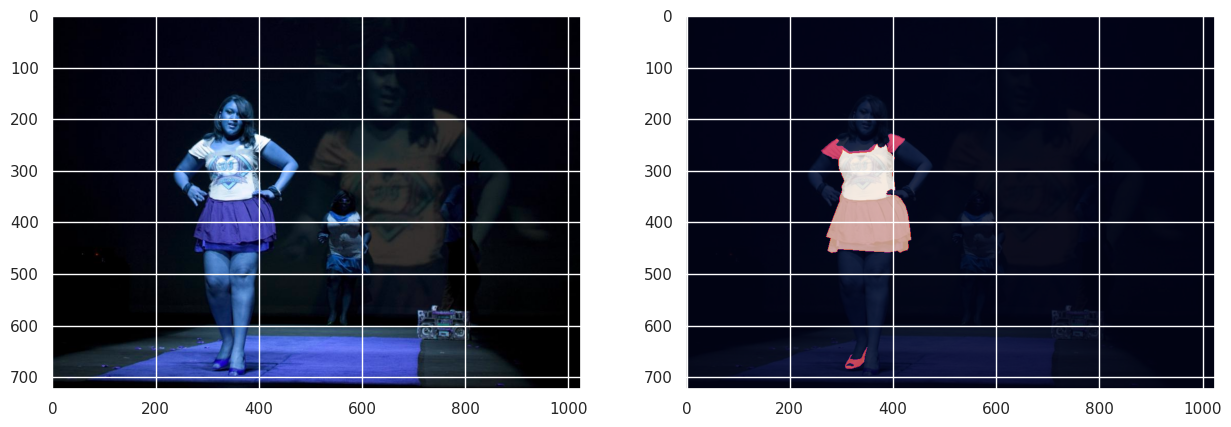

In [30]:
samples = 1
train_images_path = os.path.join(root, "train")

for _ in range(samples):
    random_id = relevant_training_data.sample().index[0]
    print("Image ID:", random_id)
    image_path = os.path.join(train_images_path, relevant_training_data.iloc[random_id]["file_name"])
    print("Image path:", image_path)
    image_info = relevant_training_data.iloc[random_id]
    print("Image info:", image_info)

    plot_raw_segmented_image(image_info, image_path)